In [2]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#1
data = pd.read_csv('vgsales.csv', sep = ',')

In [22]:
#2
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [23]:
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [25]:
data.dropna(axis='columns')


,Rank,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,Platform,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,Shooter,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,Racing,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,Puzzle,0.00,0.01,0.00,0.00,0.01


In [39]:
data = data[(data.NA_Sales > 0.5) & (data.EU_Sales > 0.5) & (data.JP_Sales > 0.5)]

In [40]:
data.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [41]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
719,721,Dissidia: Final Fantasy,PSP,2008.0,Fighting,Square Enix,0.51,0.51,0.91,0.32,2.25
811,813,Dark Souls,PS3,2011.0,Role-Playing,Namco Bandai Games,0.75,0.54,0.54,0.23,2.07
816,818,Pokemon Mystery Dungeon: Red/Blue Rescue Team,GBA,2005.0,Role-Playing,Nintendo,0.71,0.52,0.74,0.08,2.06
862,864,Devil May Cry 2,PS2,2003.0,Action,Capcom,0.71,0.58,0.51,0.17,1.97


In [44]:
#3
customscale=[[0, 'rgb(200, 255, 0)'],
            [0.5, 'rgb(255, 127, 0)'],
            [1.0, 'rgb(255, 0, 0)']]
y = data.groupby('Year')['JP_Sales'].sum()
fig = go.Figure()
fig.add_trace(go.Bar(x = data.Year, y = y,
                    marker=dict(color=data.groupby('Year')['JP_Sales'].sum(),
                        colorscale = customscale,
                        colorbar=dict(title='Продажи игр'),
                        line=dict(color='black', width=2))))

fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='ivory')

fig.update_layout(title='Глобальные продажи игр за год',
                 title_font_size=20, title_y=0.9, title_x=0.5,
                 title_xanchor='center', title_yanchor='top',
                 xaxis_title = 'Год', xaxis_title_font_size=16,
                 xaxis_tickangle=315, xaxis_tickfont_size=14,
                 yaxis_title = 'Продажи игр', yaxis_title_font_size=16,
                 yaxis_tickfont_size=14, width=None, height=700)

fig.show()

In [9]:
#4
part_80s = data.loc[(data.Year < 1995)]
part_90s = data.loc[(data.Year < 2005) & (data.Year >= 1995)]
part_00s = data.loc[(data.Year > 2005)]

labels = ['1984-1995', '1995-2005', '2005-2015']

values = [part_80s['Global_Sales'].sum(),
         part_90s['Global_Sales'].sum(),
         part_00s['Global_Sales'].sum()]

fig = go.Figure()
fig.add_trace(go.Pie(labels = labels, values = values,
                    textinfo='label+percent',
                    insidetextorientation='radial',
                    marker=dict(colors=values, line=dict(color='black', width=2))))

fig.update_layout(title='Глобальные продажи игр за год',
                 title_font_size=20, title_y=0.9, title_x=0.5,
                 title_xanchor='center', title_yanchor='top',
                 width=None, height=700)

fig.show()

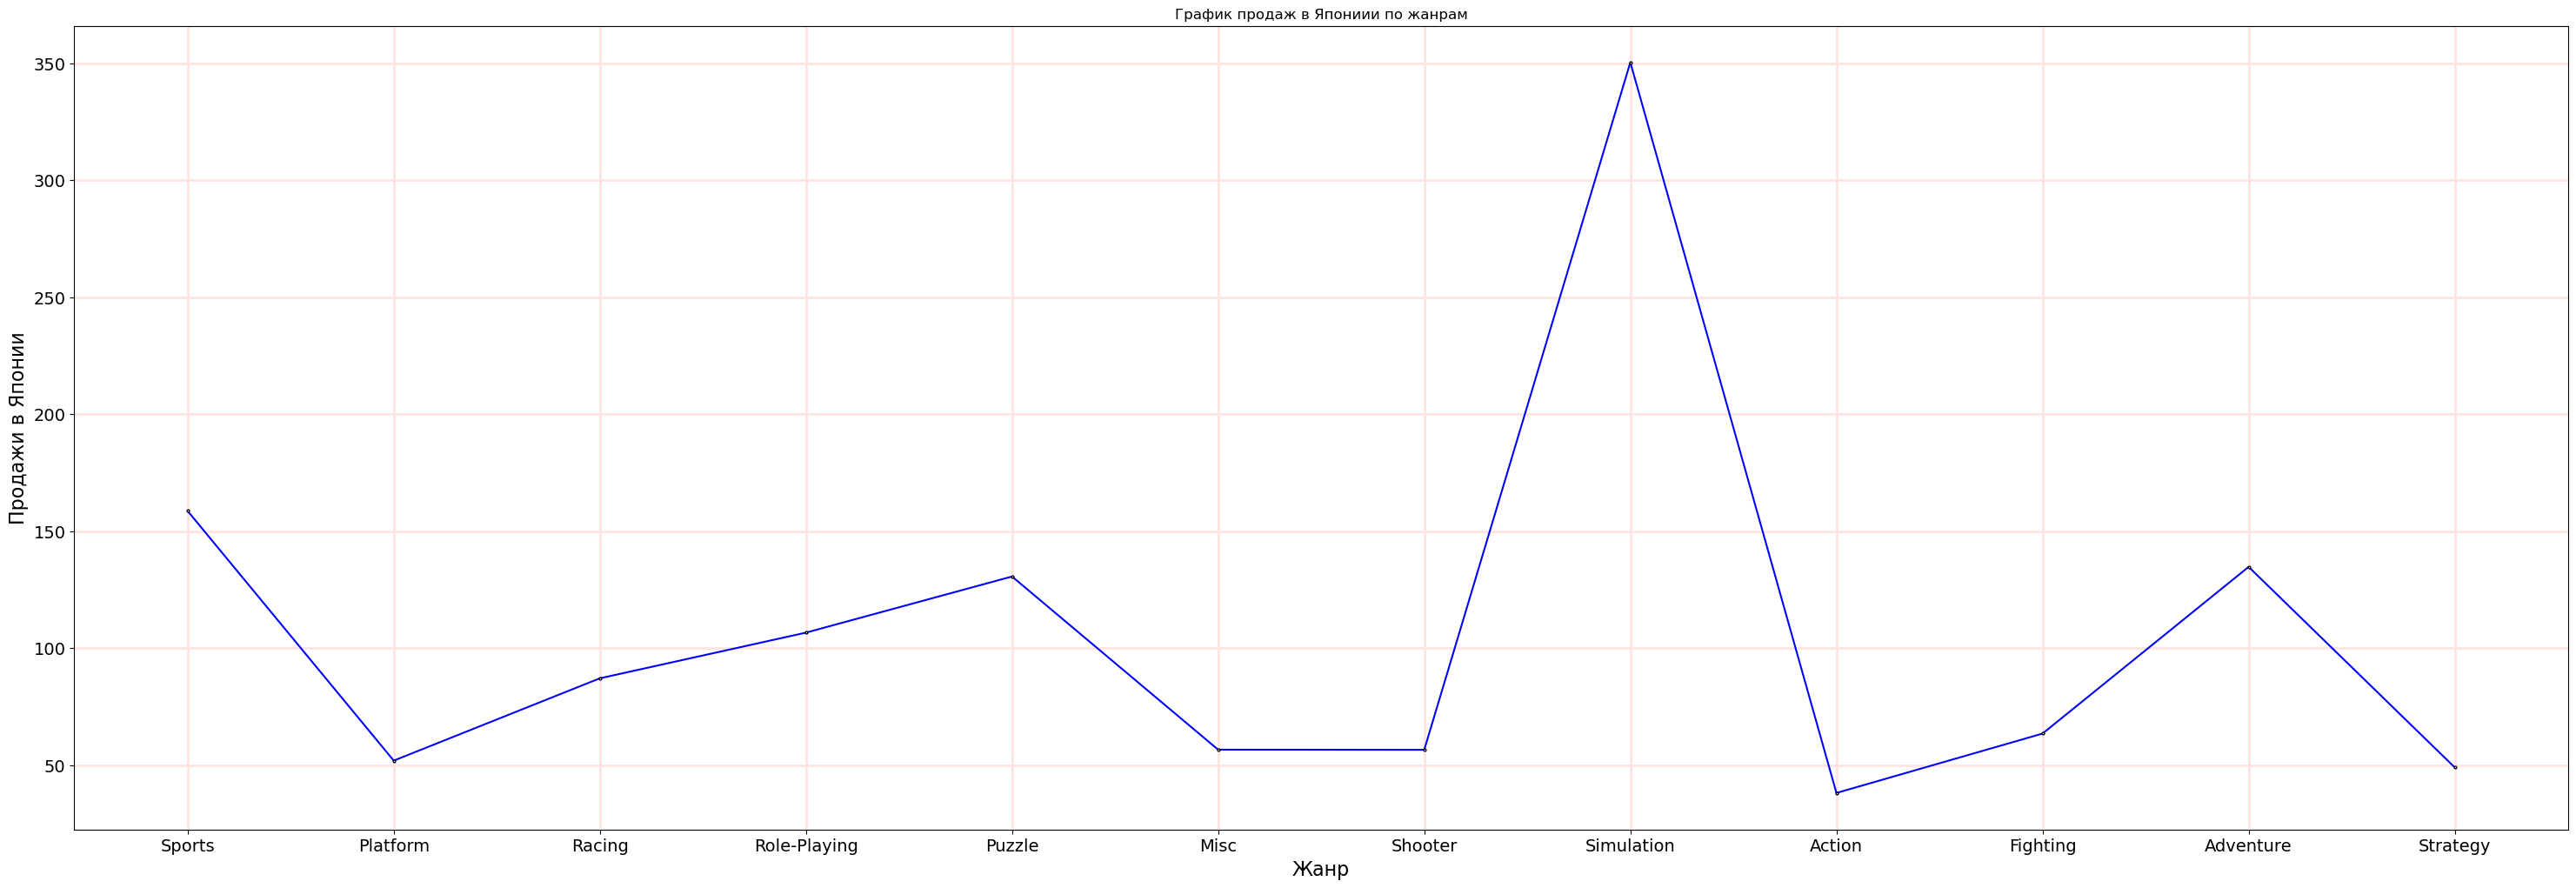

In [19]:
#5
plt.figure(figsize=(37,12))
Sales = data.groupby('Genre')['JP_Sales'].sum()
Genre = data.Genre.unique()
plt.plot(Genre, Sales, color='blue',
        marker = 'o', markersize = 2, markerfacecolor='white',
        markeredgecolor='black')

plt.grid(color='mistyrose', linewidth=2)

plt.xlabel('Жанр', size=16)
plt.ylabel('Продажи в Японии', size=16)
plt.title("График продаж в Япониии по жанрам")
plt.xticks(size=14)
plt.yticks(size=14)

plt.show()

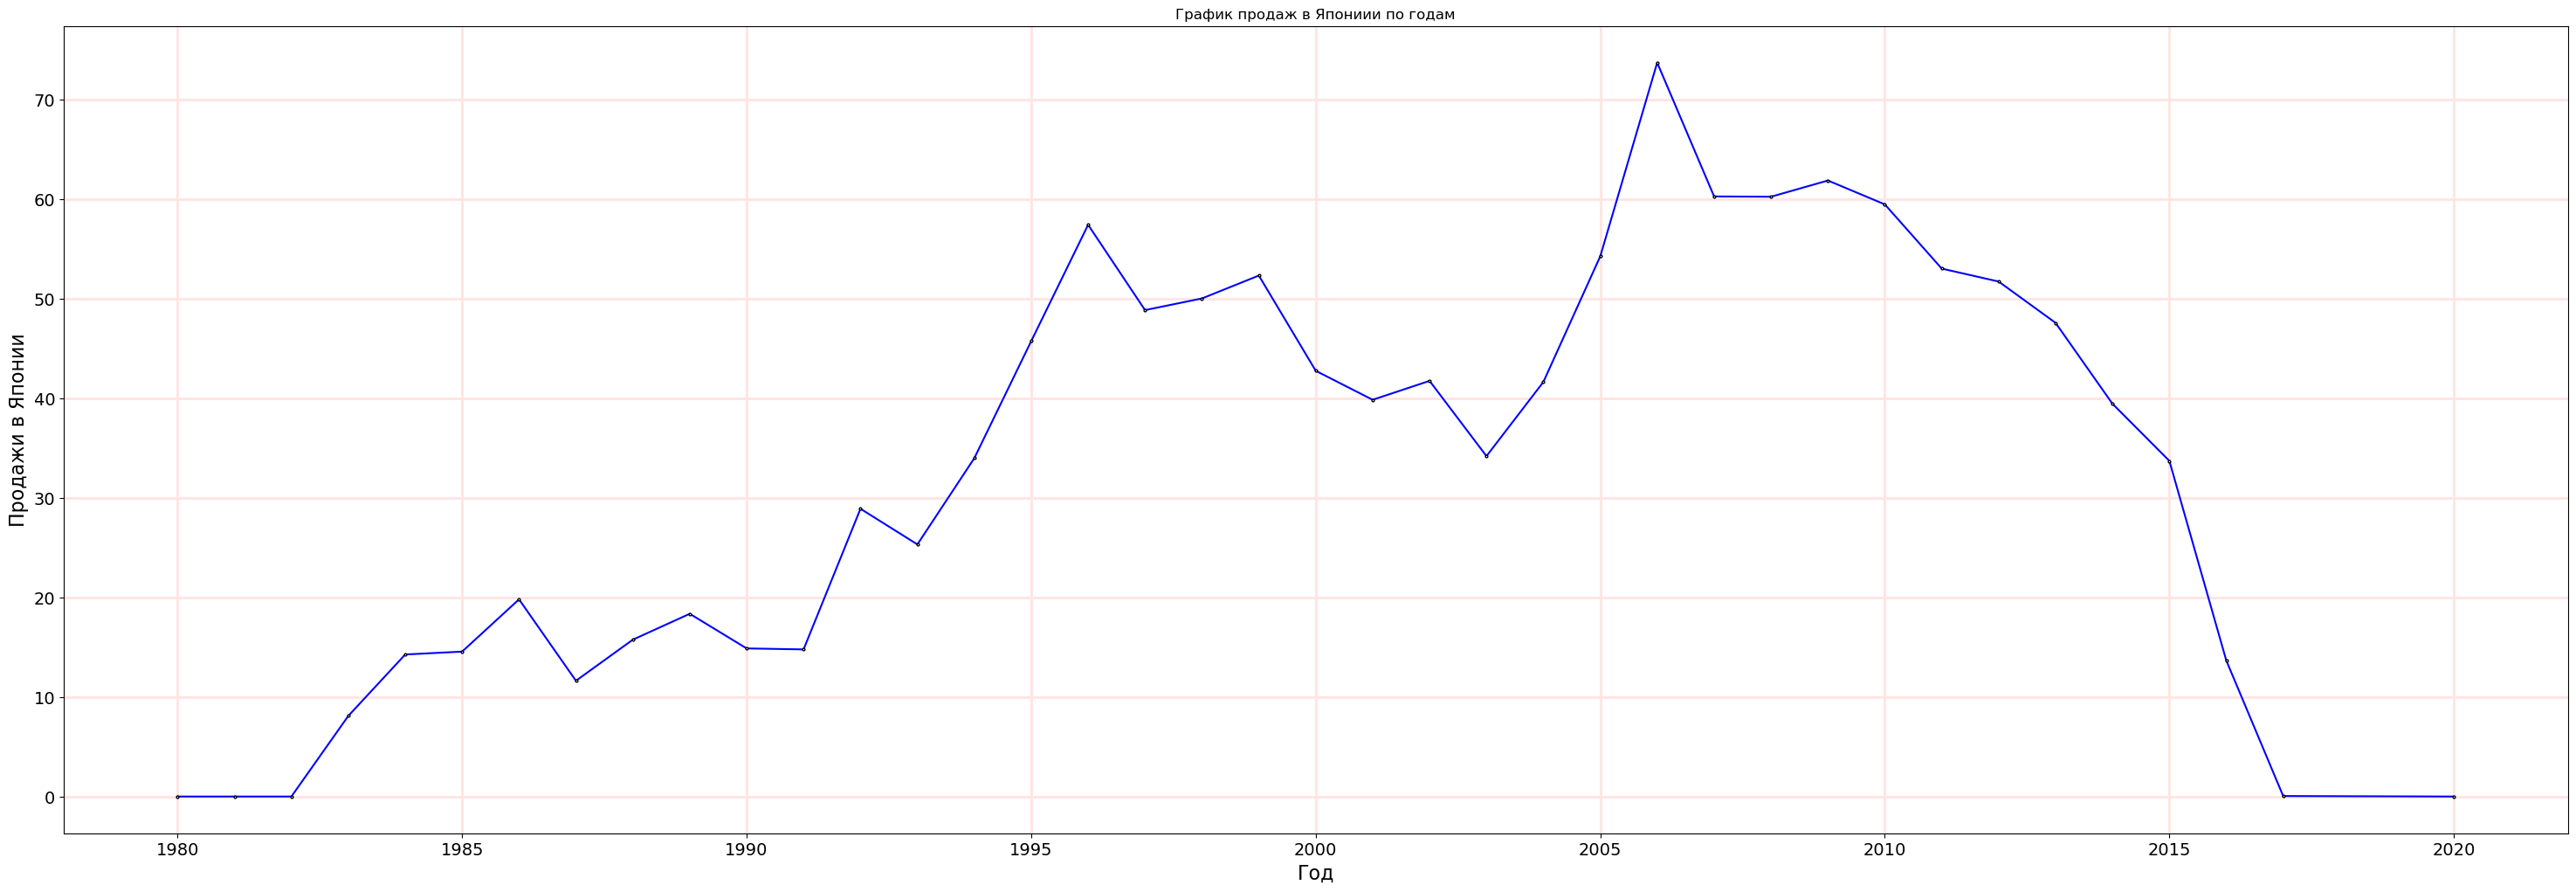

In [31]:
plt.figure(figsize=(37,12))
Sales_1 = data.groupby('Year')['JP_Sales'].sum()
Year = data.Year.unique()
Year.sort()
plt.plot(Year, Sales_1, color='blue',
        marker = 'o', markersize = 2, markerfacecolor='white',
        markeredgecolor='black')

plt.grid(color='mistyrose', linewidth=2)

plt.xlabel('Год', size=16)
plt.ylabel('Продажи в Японии', size=16)
plt.title("График продаж в Япониии по годам")
plt.xticks(size=14)
plt.yticks(size=14)

plt.show()

In [36]:
#6
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from keras.datasets import mnist


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
pip install keras 

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fe/58/34d4d8f1aa11120c2d36d7ad27d0526164b1a8ae45990a2fede31d0e59bf/keras-2.14.0-py3-none-any.whl.metadata
  Using cached keras-2.14.0-py3-none-any.whl.metadata (2.4 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7